In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

Path = os.getcwd()
print(Path)

C:\Users\fmart\Google Drive\Semesters\Spring 2021\Phys Lab\Johnson Noise Lab


In [24]:
def Standard_error(x, y, y_predict):
    """"
    x y and y_predict must all be arrays with the same number of elements.
    Returns the error of the slope.
    """  
    
    n = len(x)
    x_avg = np.mean(x)
    top = np.sum((y-y_predict)**2)
    bot = np.sum((x-x_avg)**2)
    result  = np.sqrt(1/(n-2) * top/bot)
    return(result)

## Calibration Data and Solving for Integral B:

In [25]:
# Our Calibration Data
gain1 = pd.read_csv(Path+'/Johnson Noise Data/high10_low20_run1.csv.csv')
gain2 = pd.read_csv(Path+'/Johnson Noise Data/high10_low25_run1.csv.csv')
gain3 = pd.read_csv(Path+'/Johnson Noise Data/high10_low30_run1.csv.csv')
gain4 = pd.read_csv(Path+'/Johnson Noise Data/high10_low35_run1.csv.csv')
gain5 = pd.read_csv(Path+'/Johnson Noise Data/high10_low40_run1.csv.csv')
gain6 = pd.read_csv(Path+'/Johnson Noise Data/high10_low45_run1.csv.csv')
gain7 = pd.read_csv(Path+'/Johnson Noise Data/high10_low50_run1.csv.csv')

volt1 = pd.read_csv(Path+'/Johnson Noise Data/high10_low20_volt_run1.csv.csv')
volt2 = pd.read_csv(Path+'/Johnson Noise Data/high10_low25_volt_run1.csv.csv')
volt3 = pd.read_csv(Path+'/Johnson Noise Data/high10_low30_volt_run1.csv.csv')
volt4 = pd.read_csv(Path+'/Johnson Noise Data/high10_low35_volt_run1.csv.csv')
volt5 = pd.read_csv(Path+'/Johnson Noise Data/high10_low40_volt_run1.csv.csv')
volt6 = pd.read_csv(Path+'/Johnson Noise Data/high10_low45_volt_run1.csv.csv')
volt7 = pd.read_csv(Path+'/Johnson Noise Data/high10_low50_volt_run1.csv.csv')

In [26]:
# Appending our Calibration data to fall below 150 kHz for easier viewing (just for plotting)
total1 = [gain1,gain2,gain3,gain4,gain5,gain6,gain7]

p1, p2, p3, p4, p5, p6, p7 = [],[],[],[],[],[],[]
f1, f2, f3, f4, f5, f6, f7 = [],[],[],[],[],[],[]

new_gain = [p1,p2,p3,p4,p5,p6,p7]
new_freq = [f1,f2,f3,f4,f5,f6,f7]

for i in range(len(total1)):
    for j in range(len(total1[i])):
        if total1[i]['frequency'][j] > 150000:
            pass
        else:
            new_gain[i].append(total1[i]['average'][j])
            new_freq[i].append(total1[i]['frequency'][j])
            
total2 = [volt1,volt2,volt3,volt4,volt5,volt6,volt7]

v1, v2, v3, v4, v5, v6, v7 = [],[],[],[],[],[],[]
w1, w2, w3, w4, w5, w6, w7 = [],[],[],[],[],[],[]

new_gain = [v1,v2,v3,v4,v5,v6,v7]
new_freq = [w1,w2,w3,w4,w5,w6,w7]

for i in range(len(total2)):
    for j in range(len(total2[i])):
        if total2[i]['frequency'][j] > 150000:
            pass
        else:
            new_gain[i].append(total2[i]['average'][j])
            new_freq[i].append(total2[i]['frequency'][j])

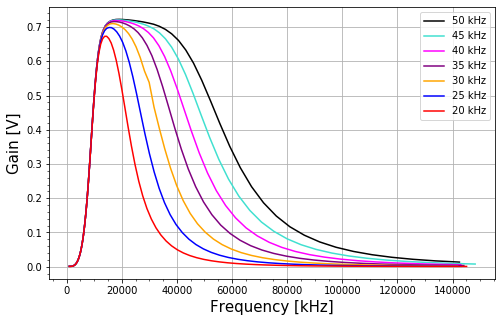

In [27]:
# Plotting the Gain of our Calibration Data
plt.figure(figsize = [8,5])
plt.plot(f7,p7,c='black', label = '50 kHz')
plt.plot(f6,p6,c='turquoise', label = '45 kHz')
plt.plot(f5,p5,c='magenta', label = '40 kHz')
plt.plot(f4,p4,c='purple', label = '35 kHz')
plt.plot(f3,p3,c='orange', label = '30 kHz')
plt.plot(f2,p2,c='blue', label = '25 kHz')
plt.plot(f1,p1,c='red', label = '20 kHz')
plt.grid()
plt.xlabel("Frequency [kHz]", size = 15)
plt.ylabel("Gain [V]", size = 15)
#plt.title("Gain Calibration for Different Low Passes", size = 15)
plt.minorticks_on()
plt.legend()
plt.savefig(Path+"/Gain Calibration.png",bbox_inches='tight')
plt.show()

In [28]:
np.max(p7)

0.7224908

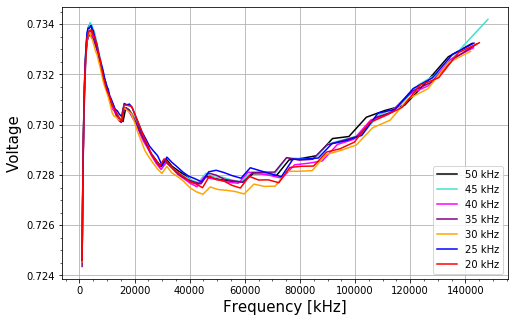

In [29]:
# Plotting the Voltage our Calibration Data used
plt.figure(figsize = [8,5])
#plt.plot(w1,v1,c='black')
plt.plot(w7,v7,c='black', label = '50 kHz')
plt.plot(w6,v6,c='turquoise', label = '45 kHz')
plt.plot(w5,v5,c='magenta', label = '40 kHz')
plt.plot(w4,v4,c='purple', label = '35 kHz')
plt.plot(w3,v3,c='orange', label = '30 kHz')
plt.plot(w2,v2,c='blue', label = '25 kHz')
plt.plot(w1,v1,c='red', label = '20 kHz')
plt.grid()
plt.xlabel("Frequency [kHz]", size = 15)
plt.ylabel("Voltage", size = 15)
#plt.title("Voltage used for our Calibration", size = 15)
plt.minorticks_on()
plt.legend()
plt.savefig(Path+"/Voltages Used in Calibration.png",bbox_inches='tight')
plt.show()

Solving The equation:

\begin{equation}
    \big<V^2_{\text{measured}}\big> = 4kTR \int g^2(f)df
\end{equation}

We need to find the integral:

\begin{equation}
    B = \int g^2(f)df
\end{equation}

By dividing the integral of each of our Calibration Gain Steps squared by the integral of each of our Calibration Voltage Steps. i.e.

\begin{equation}
    B = \frac{\int \text{gain}^2}{\int \text{volt}}
\end{equation}

In [30]:
# Solving for integral B (we will use the whole array for this part)

#20 kHz
g1 = np.trapz(gain1['average'],gain1['frequency'])
v1 = np.trapz(volt1['average'],volt1['frequency'])
B1 = g1**2/v1
print("Our integral for 20 kHz is: "+str(round(B1,5)))

#25 kHz
g2 = np.trapz(gain2['average'],gain2['frequency'])
v2 = np.trapz(volt2['average'],volt2['frequency'])
B2 = g2**2/v2
print("Our integral for 25 kHz is: "+str(round(B2,5)))

#30 kHz
g3 = np.trapz(gain3['average'],gain3['frequency'])
v3 = np.trapz(volt3['average'],volt3['frequency'])
B3 = g3**2/v3
print("Our integral for 30 kHz is: "+str(round(B3,5)))

#35 kHz
g4 = np.trapz(gain4['average'],gain4['frequency'])
v4 = np.trapz(volt4['average'],volt4['frequency'])
B4 = g4**2/v4
print("Our integral for 35 kHz is: "+str(round(B4,5)))

#40 kHz
g5 = np.trapz(gain5['average'],gain5['frequency'])
v5 = np.trapz(volt5['average'],volt5['frequency'])
B5 = g5**2/v5
print("Our integral for 40 kHz is: "+str(round(B5,5)))

#45 kHz
g6 = np.trapz(gain6['average'],gain6['frequency'])
v6 = np.trapz(volt6['average'],volt6['frequency'])
B6 = g6**2/v6
print("Our integral for 45 kHz is: "+str(round(B6,5)))

#50 kHz
g7 = np.trapz(gain7['average'],gain7['frequency'])
v7 = np.trapz(volt7['average'],volt7['frequency'])
B7 = g7**2/v7
print("Our integral for 50 kHz is: "+str(round(B7,5)))

B = np.array([B1, B2, B3, B4, B5, B6, B7])

Our integral for 20 kHz is: 1003.05598
Our integral for 25 kHz is: 1532.1623
Our integral for 30 kHz is: 2094.37133
Our integral for 35 kHz is: 2660.29376
Our integral for 40 kHz is: 3244.15938
Our integral for 45 kHz is: 3847.0626
Our integral for 50 kHz is: 4473.28879


## Measuring our Johnson noise:

So, Using the equation:

\begin{equation}
    \big<V^2_{\text{measured}}\big> = 4kTR \times B
\end{equation}

We can solve for $4kTR$ by letting:

\begin{equation}
    k = \big<V^2_{\text{measured}}\big> / (4BTR)
\end{equation}

In [60]:
Temp = 294.2611 #Kelvin

k = 1.380649e-23 #J/K Known Quantity

#Fixed B and Vary R
R = np.array([0.9960, 2.1615, 3.2269, 4.6760, 5.5943, 6.3673, 8.2624, 9.8668]) #kOhms
R_err = np.array([0.00005, 0.00003, 0.00003, 0.0003, 0.0007, 0.0004, 0.0005, 0.0003]) #kOhms

B_fix = B3

V_R = np.array([.8080536, 1.01822, 1.18421, 1.37061, 1.480758, 1.590129, 1.753694, 1.902162]) #mV
V_R_err = np.array([0.006911, 0.007929, 0.0091169, 0.0124905, 0.0119477, 0.012222, 0.01289, 0.017917]) #mV

#Fixed R and Vary B
Hz = np.array([20, 25, 30, 35, 40, 45, 50]) #kHz

R_fix = 9.8668 #kOhms
R_fix_err = 0.0003 #kOhmz

V_B = np.array([1.34819, 1.641931, 1.895127, 2.132317, 2.33739, 2.531001, 2.714841]) #mV
V_B_err = np.array([0.0158668, 0.0139844, 0.0106295, 0.018602, 0.0169521, 0.0184074, 0.0168856]) #mV

In [54]:
B3

2094.371331477675

In [61]:
#Fixed B Vary R-------------------------------------------------
print("Fixed B Vary R:")
print(" ")
x1,y1 = R,V_R**2

slope1, intercept1 = np.polyfit(x1,y1, 1)
xrange1 = np.linspace(0.5,10.5,5000)

func1 = slope1 * xrange1 + intercept1

#Units: uT/Amps
print("Slope = " + str(slope1))
print("Intercept = " + str(intercept1))

expected = []
residuals1 = []
new_y = []
for i in range(len(x1)):
    expected.append(x1[i] * slope1 + intercept1)
    residuals1.append((expected[i]-y1[i])) 
    
expected1 = np.array(expected)

slope_err1 = Standard_error(x1,y1,expected1)
print("The error for our slope is = " + str(slope_err1))

k_1 = slope1/(Temp* B_fix*4)
k_1 = k_1/((1e8)**2)
k_1_err = 1.3998026970031517e-8  #Found with error propigation calculator

print("Our k_B constant was measured to be: "+str(k_1)+" J/K")
print("With the error: "+str(k_1_err/(10*(1e8)**2))+" J/K")
print("This measurement is off the actual value by "+str(round(((k_1-k)/k)*100,3))+"%")
print("---------------------------------------------------------")
print(" ")


#Fixed R Vary B ------------------------------------------------
print("Fixed R Vary B:")
print(" ")
x2,y2 = B,V_B**2

slope2, intercept2 = np.polyfit(x2,y2, 1)
xrange2 = np.linspace(900,4700,50000)

func2 = slope2 * xrange2 + intercept2

#Units: uT/Amps
print("Slope = " + str(slope2))
print("Intercept = " + str(intercept2))

expected = []
residuals2 = []
new_y = []
for i in range(len(x2)):
    expected.append(x2[i] * slope2 + intercept2)
    residuals2.append((expected[i]-y2[i])) 
    
expected2 = np.array(expected)

slope_err2 = Standard_error(x2,y2,expected2)
print("The error for our slope is = " + str(slope_err2))

k_2 = slope2/(Temp*R_fix/1000*4)
k_2 = k_2/(10*1e9**2)
k_2_err = 8.781545954721356e-9  #Found with error propigation calculator

print("Our k_B constant was measured to be: "+str(k_2)+ " J/K")
print("With the error: "+str(k_2_err/((1e9)**2))+" J/K")
print("This measurement is off the actual value by "+str(round(((k_2-k)/k)*100,3))+"%")
print("---------------------------------------------------------")
print(" ")

Fixed B Vary R:
 
Slope = 0.33570506955875623
Intercept = 0.32134982971645915
The error for our slope is = 0.0038921239089361455
Our k_B constant was measured to be: 1.3617938539123513e-23 J/K
With the error: 1.3998026970031517e-25 J/K
This measurement is off the actual value by -1.366%
---------------------------------------------------------
 
Fixed R Vary B:
 
Slope = 0.0016022823364216534
Intercept = 0.2402132627627713
The error for our slope is = 1.0198647314155065e-05
Our k_B constant was measured to be: 1.3796530153484708e-23 J/K
With the error: 8.781545954721356e-27 J/K
This measurement is off the actual value by -0.072%
---------------------------------------------------------
 


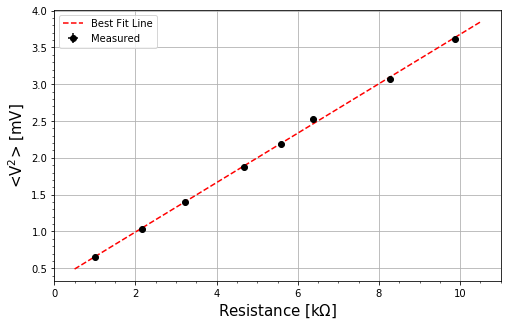

In [48]:
plt.figure(figsize = [8,5])
plt.errorbar(xrange1, func1, fmt ='--',color = 'red',label='Best Fit Line')
plt.errorbar(R,V_R**2,yerr=V_R_err**2,xerr=R_err, fmt ='o',color = 'black',label='Measured')
#plt.errorbar(x, y, xerr=error_adj, fmt ='o',color = 'black',label='Measured')
plt.grid()
plt.ylabel("<V$^2$> [mV]", size = 15)
plt.xlabel("Resistance [k$\Omega$]", size = 15)
#plt.title("Fixed B Vary R", size = 15)
plt.legend()
plt.minorticks_on()
plt.savefig(Path + "/Fixed B Vary R.png",bbox_inches='tight')
plt.show()

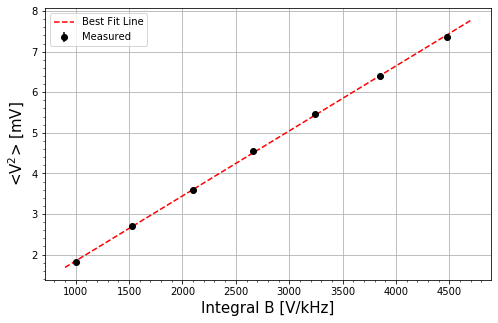

In [50]:
plt.figure(figsize = [8,5])
plt.errorbar(xrange2, func2, fmt ='--',color = 'red',label='Best Fit Line')
plt.errorbar(x2, y2,yerr=V_B_err**2, fmt ='o',color = 'black',label='Measured')
#plt.errorbar(x, y, xerr=error_adj, fmt ='o',color = 'black',label='Measured')
plt.grid()
plt.ylabel("<V$^2$> [mV]", size = 15)
plt.xlabel("Integral B [V/kHz]", size = 15)
#plt.title("Fixed R Vary B", size = 15)
plt.legend()
plt.minorticks_on()
plt.savefig(Path + "/Fixed R Vary B.png",bbox_inches='tight')
plt.show()